In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting tmp/data/train-images-idx3-ubyte.gz
Extracting tmp/data/train-labels-idx1-ubyte.gz
Extracting tmp/data/t10k-images-idx3-ubyte.gz
Extracting tmp/data/t10k-labels-idx1-ubyte.gz


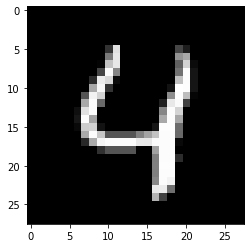

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("tmp/data/")
image = mnist.test.images[4].reshape(28, 28)
plt.imshow(image, cmap='gray')

In [0]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [0]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name = "X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [0]:
def neuron_layer(X, n_neurons, name,activation=None):
  with tf.name_scope(name):
    n_inputs = int(X.get_shape()[1])
    stddev = 2/ np.sqrt(n_inputs)
    init = tf.truncated_normal((n_inputs, n_neurons),stddev=stddev)
    W = tf.Variable(init, name="weights")
    b = tf.Variable(tf.zeros([n_neurons]), name="biases")
    z = tf.matmul(X, W)+b
    if activation=="relu":
      return tf.nn.relu(z)
    else:
      return z
      

In [7]:
from tensorflow.contrib.layers import fully_connected

with tf.name_scope("dnn"):
  hiddeni1 = fully_connected(X,n_hidden1,scope="hiddeni1")
  hiddeni2 = fully_connected(hiddeni1,n_hidden2,scope="hiddeni2")
  logits = fully_connected(hiddeni2,n_outputs,scope="outputs",activation_fn=None)

Instructions for updating:
Please use `layer.__call__` method instead.


In [0]:
with tf.name_scope("loss"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
  loss = tf.reduce_mean(xentropy, name="loss")

In [0]:
learning_rate = 0.01
with tf.name_scope("train"):
  optimizer = tf.train.GradientDescentOptimizer(learning_rate)
  training_op = optimizer.minimize(loss)

In [0]:
with tf.name_scope("eval"):
  correct = tf.nn.in_top_k(logits, y ,1)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
n_epochs = 10
batch_size = 50

In [15]:
with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for iteration in range(mnist.train.num_examples // batch_size):
      X_batch, y_batch = mnist.train.next_batch(batch_size)
      sess.run(training_op, feed_dict={X: X_batch, y:y_batch})

    acc_train = accuracy.eval(feed_dict={X:X_batch,y:y_batch})
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,y: mnist.test.labels})
    print(epoch, "Training accuracy:",acc_train,"Test accuracy:",acc_test)
  save_path = saver.save(sess, "my_model.ckpt")

0 Training accuracy: 0.88 Test accuracy: 0.9035
1 Training accuracy: 0.9 Test accuracy: 0.9174
2 Training accuracy: 0.94 Test accuracy: 0.9311
3 Training accuracy: 1.0 Test accuracy: 0.9367
4 Training accuracy: 0.96 Test accuracy: 0.9418
5 Training accuracy: 0.94 Test accuracy: 0.9453
6 Training accuracy: 0.98 Test accuracy: 0.9496
7 Training accuracy: 0.96 Test accuracy: 0.9527
8 Training accuracy: 0.98 Test accuracy: 0.9549
9 Training accuracy: 1.0 Test accuracy: 0.9597


In [16]:
with tf.Session() as sess:
  saver.restore(sess, tf.train.latest_checkpoint('./'))
  X_new_scaled = mnist.test.images 
  Z = logits.eval(feed_dict={X: X_new_scaled})
  y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model.ckpt


In [18]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])